## Intro to Modern Portfolio Theory

MPT was posited by Harry Markowitz in 1952, as means of construct a portfolio of assets that maximize returns within a given level of risk or to construct one with a desired level of expected returns with the least amount of risk.


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# local import
from edu_utils import random_weights, random_portfolio_stats

In [2]:
stocks = ["goog", "cmg", "dg", "sbux", "tfc", "nvda"]
num_stocks = len(stocks)

prices = yf.download(stocks, start="2015-01-01")["Adj Close"]
returns = (prices / prices.shift(1)).dropna(axis=0) - 1  # daily returns

[*********************100%%**********************]  6 of 6 completed


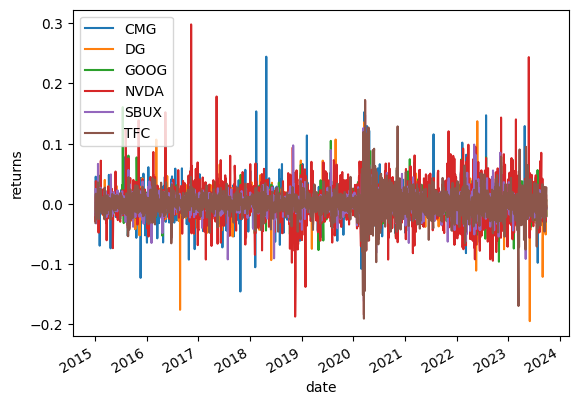

In [3]:
returns.plot(ylabel="returns", xlabel="date")
plt.show()

In [4]:
random_weights(num_stocks)

array([0.26278647, 0.19822304, 0.01771509, 0.17488251, 0.24417195,
       0.10222094])

In [5]:
n_portfolios = 1000
port_returns = np.zeros(n_portfolios)
port_stdevs = np.zeros(n_portfolios)

hist_mean = returns.mean(axis=0).to_frame()
hist_mean.columns = ["mu"]
hist_cov = returns.cov()

for idx in range(n_portfolios):
    w = random_weights(num_stocks)  # random weights that sum to 1
    port_returns[idx], port_stdevs[idx] = random_portfolio_stats(hist_mean=hist_mean, hist_cov=hist_cov, weights=w)

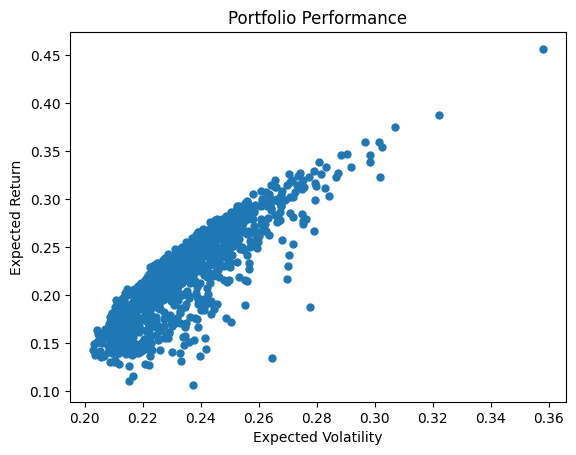

In [8]:
plt.plot(port_stdevs, port_returns, "o", markersize=5)
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.title("Portfolio Performance")
plt.show()

# Task

Using the code above, find the portfolio with the highest sharpe, the portfolio with the lowest vol, and the efficient frontier and plot it. After which, do the same using the some optimization library (eg, `scipy`)
